In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics

#Load dataset
data = pd.read_csv("C:\\Users\\KJadeja\\zomato.csv")

#Printing first 5 records
data.head()

#Change name
data.rename(columns={"approx_cost(for two people)":"average_cost"},inplace=True)
#Drop non-required columns
data.drop(columns=['url','name','address','phone','dish_liked','reviews_list','menu_item','listed_in(city)','listed_in(type)'], inplace  =True)

data.head()



,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost
0,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800
1,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800
2,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800
3,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300
4,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600


In [4]:
# data transformation
data['rate'] = data['rate'].replace('NEW',np.NaN)
data['rate'] = data['rate'].replace('-',np.NaN)
data.dropna(how = 'any', inplace = True)
data['rate'] = data.loc[:,'rate'].replace('[ ]','',regex = True)
data['rate'] = data['rate'].astype(str)
data['rate'] = data['rate'].apply(lambda r: r.replace('/5',''))
data['rate'] = data['rate'].apply(lambda r: float(r))

cuisines_data = data[data.cuisines.notnull()]
cuisines_data.cuisines = cuisines_data.cuisines.apply(lambda x:x.lower().strip())
cuisines_count= []

for i in cuisines_data.cuisines:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)
        
data['online_order']= pd.get_dummies(data.online_order, drop_first=True)
data['book_table']= pd.get_dummies(data.book_table, drop_first=True)

data['rest_type'] = data['rest_type'].str.replace(',' , '') 
data['rest_type'] = data['rest_type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data['cuisines'] = data['cuisines'].str.replace(',' , '') 
data['cuisines'] = data['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))

#label encoding
from sklearn.preprocessing import LabelEncoder
T = LabelEncoder()                 
data['location'] = T.fit_transform(data['location'])
data['rest_type'] = T.fit_transform(data['rest_type'])
data['cuisines'] = T.fit_transform(data['cuisines'])
data['average_cost'] = data['average_cost'].str.replace(',' , '') 
data["average_cost"] = data["average_cost"].astype('float')

data.head()


,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost
0,1,1,4.1,775,1,38,1246,800.0
1,1,0,4.1,787,1,38,1259,800.0
2,1,0,3.8,918,1,30,1052,800.0
3,0,0,3.7,88,1,27,1570,300.0
4,0,0,3.8,166,4,38,1612,600.0


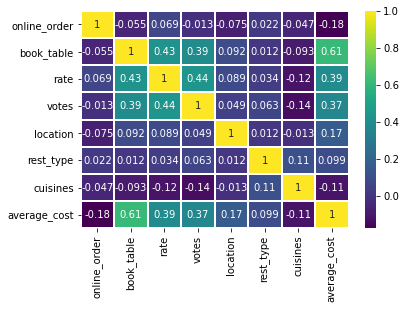

In [5]:
#seaborn heatmap function to plot the correlation grid
sns.heatmap(data.corr(), annot = True, cmap = "viridis",linecolor='white',linewidths=1)
plt.show()

Training Accuracy 98.72455474844595
Testing Accuracy 94.41417080472017
R-2 score :  0.9441417080472017
online_order  :  0.017061092917437872
book_table  :  0.018469150587698838
votes  :  0.5333945194046853
location  :  0.1125447925776877
rest_type  :  0.06539466228059591
cuisines  :  0.1589800087811641
average_cost  :  0.09415577345073049


<BarContainer object of 7 artists>

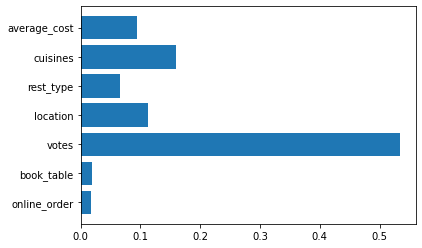

In [6]:
#Set target variable
x = data.drop(columns=['rate'])
y = data['rate']

#standarizing
#taking numeric values
from sklearn.preprocessing import StandardScaler

num_values1=data.select_dtypes(['float64','int64']).columns
scaler = StandardScaler()
scaler.fit(data[num_values1])
data[num_values1]=scaler.transform(data[num_values1])

data.head()


from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

#train & test split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 0)

#rfr = RandomForestRegressor(n_estimators=20,max_depth=5)
#Fit the model
rfr = RandomForestRegressor(n_estimators=10)
rfr.fit(X_train,y_train)

#predicted y-value
y_pred = rfr.predict(X_test)
#training accuracy
tra=rfr.score(X_train,y_train)*100
#test accuracy
tea=rfr.score(X_test,y_test)*100

print("Training Accuracy",tra)
print("Testing Accuracy",tea)

#R-square value
from sklearn.metrics import r2_score

rsquarevalue = r2_score(y_test, y_pred) 
print("R-2 score : ", rsquarevalue) 

# get importance
importance = rfr.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    #print('Feature: %0d, Score: %.5f' % (i,v))
    print(x.columns[i],' : ',v)
    
# plot feature importance
plt.barh(x.columns, rfr.feature_importances_)

In [8]:
"""
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scipy import stats

model1=sm.OLS(X_train,y_train)
result=model1.fit()
#print(result.summary())
print("pvalues\n",result.pvalues)
print("tvalues\n",result.tvalues)
print("rsquared\n",result.rsquared)
print("rsquared_adj\n",result.rsquared_adj)
"""

#spearman and pearson corelation value
from scipy.stats import spearmanr, pearsonr 

spearman = spearmanr(y_test, y_pred) 
pearson = pearsonr(y_test, y_pred) 
print(f'Test data Spearman correlation: {spearman[0]:.3}') 
print(f'Test data Pearson correlation: {pearson[0]:.3}') 

#RMSE
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import MinMaxScaler 

mse=mean_squared_error(y_test,y_pred) 
rmse=np.sqrt(mse) 
print('Root-Mean-Square Error (RMSE):',rmse) 


Test data Spearman correlation: 0.973
Test data Pearson correlation: 0.972
Root-Mean-Square Error (RMSE): 0.2313510204169978


In [9]:
# evaluate the model 
from numpy import mean 
from numpy import std 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import RepeatedKFold 
 
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1) 
n_scores = cross_val_score(rfr, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise') 

# report performance 
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores))) 


MAE: -0.102 (0.004)
